#Machine Learning Group Task 1 : Feature Selection & Regression using ANN


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LassoCV
import matplotlib
import matplotlib.pyplot as plt
from keras.optimizers import Adam



#   1 )  Grab the dataset





In [2]:
housing_pricing_data=pd.read_csv('/content/Housing Pricing.csv')

In [3]:
housing_pricing_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [4]:
housing_pricing_data.shape

(1460, 77)

**Drop unnecessary columns**





In [5]:
housing_pricing_data.drop('Id',inplace=True,axis=1)

In [6]:
housing_pricing_data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


**Check the number of features present**

In [7]:
all_features=list(housing_pricing_data.columns)
len(all_features)

76

**Check the number of features with missing values**

In [8]:
features_missing_values=list(housing_pricing_data.columns[housing_pricing_data.isna().any()])
len(features_missing_values)

15

# 2 ) Fill in missing features using forward fill, backward fill and mean fill

In [9]:
bfill,mean_fill=[],[]

In [10]:
for feature in features_missing_values:
  print(feature,' ',housing_pricing_data[feature].isna().sum()/len(housing_pricing_data)*100,' ',housing_pricing_data[feature].dtype)
  if housing_pricing_data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


**Mean fill implementation**




In [11]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
for feature in mean_fill:
  housing_pricing_data[feature].fillna(housing_pricing_data[feature].mean(),inplace=True)

**Backward fill implementation**

In [13]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [14]:
for feature in bfill:
  housing_pricing_data[feature].fillna(method='bfill',inplace=True)

**Confirm if all values have been filled**

In [15]:
housing_pricing_data.columns[housing_pricing_data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [16]:
housing_pricing_data['FireplaceQu'].isna().sum()

2

**Forward fill implementation**

In [17]:
housing_pricing_data['FireplaceQu'].fillna(method='ffill',inplace=True)

# 3 ) Encode the dataset

**List the categorical data(data that is not in numerical form)**

In [18]:
categorical_features=list(housing_pricing_data.select_dtypes(include=['object']).columns)

In [19]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

**List the numerical data**

In [20]:
numerical_features=list(set(all_features)-set(categorical_features))

In [21]:
numerical_features

['EnclosedPorch',
 'YearBuilt',
 'TotalBsmtSF',
 'YrSold',
 'BsmtFinSF2',
 'YearRemodAdd',
 'MSSubClass',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'BsmtFullBath',
 'KitchenAbvGr',
 'Fireplaces',
 'WoodDeckSF',
 'LotFrontage',
 'ScreenPorch',
 'LotArea',
 'GrLivArea',
 'OverallQual',
 'LowQualFinSF',
 'BsmtHalfBath',
 'HalfBath',
 'GarageYrBlt',
 'BedroomAbvGr',
 'MiscVal',
 'OpenPorchSF',
 'MoSold',
 'BsmtUnfSF',
 'OverallCond',
 '3SsnPorch',
 '2ndFlrSF',
 'MasVnrArea',
 'GarageArea',
 'GarageCars',
 'FullBath',
 'BsmtFinSF1',
 'SalePrice',
 'PoolArea']

**Separate the categorical data into nominal and ordinals**

In [22]:
nominal=['MSZoning','LandContour','Neighborhood']

In [23]:
ordinal=list(set(categorical_features)-set(nominal))

**Set the target**

In [24]:
target=['SalePrice']

**Encode the ordinals using numerical encoding**

In [25]:
for feature in ordinal:
  housing_pricing_data[feature]=housing_pricing_data[feature].astype('category').cat.codes

df_ordinal=housing_pricing_data[ordinal]

**Encode the nominals using one hot encoding**

In [26]:
df_nominal=pd.get_dummies(housing_pricing_data[nominal])

**Use concatenation to merge the nominal, ordinal and numerical dataframes**

In [27]:
new_housing_pricing_data=pd.concat([df_nominal,df_ordinal,housing_pricing_data[numerical_features]],axis=1)

In [28]:
data = new_housing_pricing_data


In [29]:
new_housing_pricing_data.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandSlope,BsmtFinType1,HouseStyle,Exterior2nd,BsmtFinType2,ExterCond,...,RoofMatl,Street,RoofStyle,EnclosedPorch,YearBuilt,TotalBsmtSF,YrSold,BsmtFinSF2,YearRemodAdd,MSSubClass,1stFlrSF,TotRmsAbvGrd,BsmtFullBath,KitchenAbvGr,Fireplaces,WoodDeckSF,LotFrontage,ScreenPorch,LotArea,GrLivArea,OverallQual,LowQualFinSF,BsmtHalfBath,HalfBath,GarageYrBlt,BedroomAbvGr,MiscVal,OpenPorchSF,MoSold,BsmtUnfSF,OverallCond,3SsnPorch,2ndFlrSF,MasVnrArea,GarageArea,GarageCars,FullBath,BsmtFinSF1,SalePrice,PoolArea
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,13,5,4,...,1,1,1,0,2003,856,2008,0,2003,60,856,8,1,1,0,0,65.0,0,8450,1710,7,0,0,1,2003.0,3,0,61,2,150,5,0,854,196.0,548,2,2,706,208500,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,8,5,4,...,1,1,1,0,1976,1262,2007,0,1976,20,1262,6,0,1,1,298,80.0,0,9600,1262,6,0,1,0,1976.0,3,0,0,5,284,8,0,0,0.0,460,2,2,978,181500,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,13,5,4,...,1,1,1,0,2001,920,2008,0,2002,60,920,6,1,1,1,0,68.0,0,11250,1786,7,0,0,1,2001.0,3,0,42,9,434,5,0,866,162.0,608,2,2,486,223500,0


In [30]:
new_housing_pricing_data.shape

(1460, 107)

# 4 ) Standardize the dataset using sklearn

> Importance: Scales the data within a certain bound (Eg:0-1) so as to stabilize the model



**Separate the features(x) and the target data(y) by dropping the target column**
 




In [31]:
new_housing_pricing_data.drop('SalePrice',axis=1,inplace=True)

**Convert the features into a matrix**

In [32]:
x=new_housing_pricing_data.to_numpy()

In [33]:
x[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
       5.000e+00, 1.300e+01, 5.000e+00, 4.000e+00, 6.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
       2.000e+00, 1.000e+00, 8.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
       3.000e+00, 4.000e+00, 1.000e+00, 1.200e+01, 4.000e+00, 4.000e+00,
       2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.003e+03,
       8.560e+02, 2.008e+03, 0.000e+00, 2.003e+03, 6.000e+01, 8.560e+02,
       8.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 

**Standardize the features(x)**

In [34]:
x=StandardScaler().fit_transform(x)

In [35]:
x[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888, -0.22571613,
       -0.40779461,  1.02668924,  0.75162623,  0.30941909,  0.36420746,
        0.25597761, -0.41169079,  0.18797343,  0.26381257,  0.28974476,
       -0.03628912, -0.02618016, -0.23012211, -1.23804229,  0.60466978,
       -0.88465767,  0.75073056, -0.03174026,  0.303692  ,  0.83559903,
       -0.12304604,  0.31386709, -0.77797579, -0.40936914,  0.28780036,
        0.64046232,  1.11993319, -0.71775144,  0.74309239,  0.22403433,
        0.2085023 , -0.29055229, -0.12579688,  0.06423821, -0.49

**Grab the target data (y)**

In [36]:
y=housing_pricing_data[target]

**Convert the target data (y) into a matrix**

In [37]:
y=y.to_numpy()

In [38]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

**Standardize the target data (y)**

In [39]:
y=StandardScaler().fit_transform(y)

In [40]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# 5 ) Feature selection using L1

> If the feature is irrelevant, lasso(L1 regularization) penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.



In [41]:
regressor = LassoCV()
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [42]:
coef = pd.Series(regressor.coef_, index = new_housing_pricing_data.columns)

**Plot the results of the feature selection**

L1 selected only  72  features out of  106  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

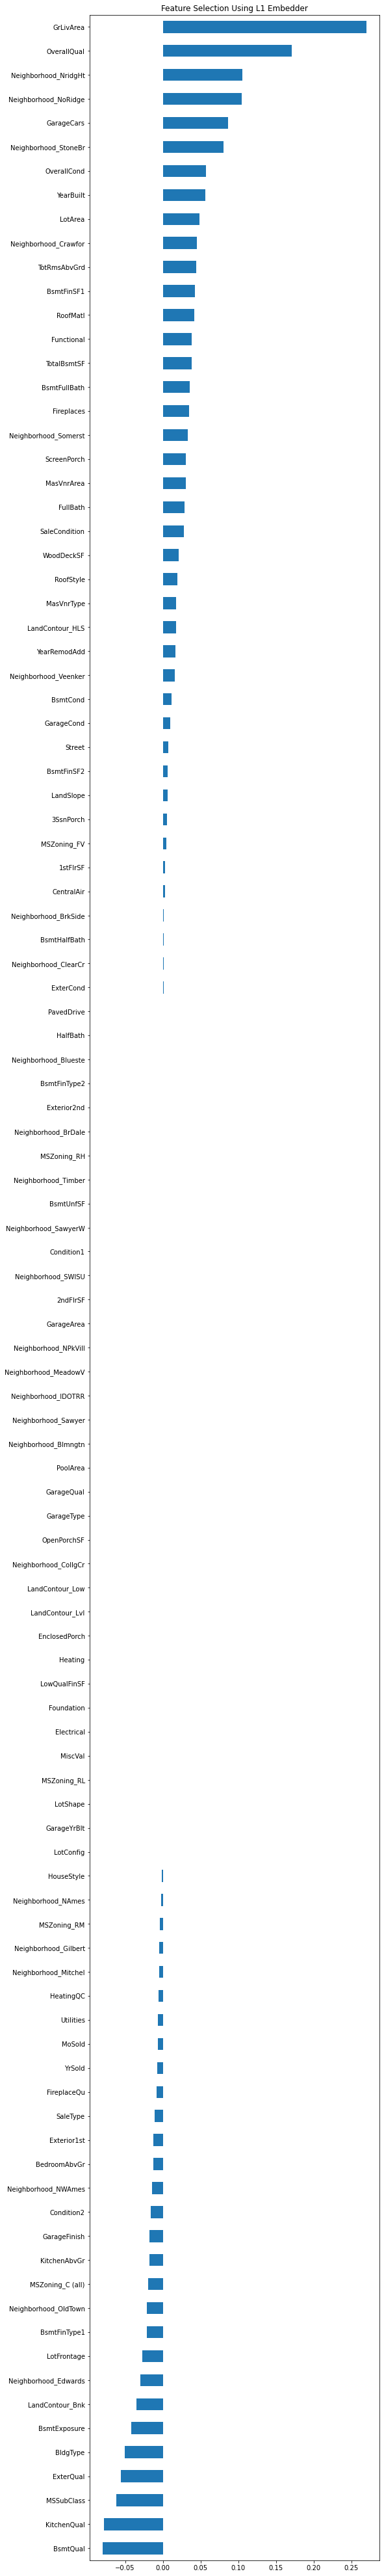

In [43]:
sorted_coef = coef.sort_values()

#Set the width and height of the figure
matplotlib.rcParams['figure.figsize'] = (8.0, 72.0)

#Use a Horizontal bar plot
sorted_coef.plot(kind = "barh")

#Get number of selected & rejected features
no_of_selected_features = sum(coef != 0)
no_of_rejected_features = sum(coef == 0)

#Get the total number of features
total_features = no_of_selected_features + no_of_rejected_features

print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")

plt.title("Feature Selection Using L1 Embedder")

**Reduce x to only the selected features**

In [70]:
sorted_coef


BsmtQual               -0.079785
KitchenQual            -0.078287
MSSubClass             -0.062044
ExterQual              -0.056048
BldgType               -0.050204
                          ...   
GarageCars              0.086129
Neighborhood_NoRidge    0.104171
Neighborhood_NridgHt    0.105403
OverallQual             0.170766
GrLivArea               0.269728
Length: 106, dtype: float64

# 6 ) Train a regression model using Deep Feed Forward ANN on 70% of the dataset


**Split the dataset into  train and test sets**
> 30% of the dataset - test set,
> 70% of the dataset -train set



In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Deep Feed Forward ANN**
> **Initialize the number of epochs**


In [46]:
epochs=200

In [47]:
model=Sequential()
model.add(Dense(4, input_shape=(106,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


**Instantiate the Adam optimizer and set the learning rate to 0.01**

In [48]:
model.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['Precision','Recall'])

**Fit model on the train dataset**

In [49]:
history = model.fit(x_train, y_train, verbose=0, epochs=epochs)

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 428       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [51]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()

,loss,precision,recall
0,0.101355,1.0,0.400196
1,-0.623309,1.0,0.277887
2,-1.166092,1.0,0.258317
3,-1.594760,1.0,0.264188
4,-1.989974,1.0,0.252446


In [52]:
historydf['F-Measure']=(2*historydf['precision']*historydf['recall'])/(historydf['precision']+historydf['recall'])

In [53]:
historydf.head()

,loss,precision,recall,F-Measure
0,0.101355,1.0,0.400196,0.571628
1,-0.623309,1.0,0.277887,0.434916
2,-1.166092,1.0,0.258317,0.410575
3,-1.594760,1.0,0.264188,0.417957
4,-1.989974,1.0,0.252446,0.403125


In [54]:
historydf.drop(['precision','recall'],axis=1,inplace=True)

In [55]:
final_loss=historydf['loss'].to_numpy()[-1]
final_f1=historydf['F-Measure'].to_numpy()[-1]

In [ ]:
historydf.plot()
plt.title('Final Loss: %.3f, Final F1_score: %.3f' % (final_loss, final_f1))

# 7 ) Test on 30% of the dataset and explain the metric

In [57]:
model.predict(x_test), x_test, y_test,epochs

(array([[1.00000000e+00],
        [0.00000000e+00],
        [2.22851396e-01],
        [9.77016509e-01],
        [1.00000000e+00],
        [9.99995470e-01],
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00],
        [2.22546339e-01],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.00560719e-01],
        [1.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00],
        [2.23008007e-01],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.00000000e+00],
        [3.57879579e-01],
        [1.0